In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
import random 
import h5py
import os

# Settings.
scale = 3 # 몇배로 scaling건지
size_input = 33 # sub image data size
size_label = 21
stride = 14  
padding = abs(size_input - size_label) / 2
counter = 0 # training data 갯수
sub_sampling_data=[]
image_data=[]#training data load 
for i in glob.glob("./Train/*.bmp"):# load image data
    n=cv2.imread(i,cv2.IMREAD_COLOR)
    n=cv2.cvtColor(n, cv2.COLOR_BGR2RGB)# matplotlib = RGB channel , opencv = BGR channels
    image_data.append(n)

C:\Users\Robotmedia9\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

#image subsampling (상하좌우 4장, 이미지 중앙 sub smapling)
def sub_sampling(image,size_input):#image, crop size, stride 
    sub_data=[]
    size = image.shape    # image size
    rows, cols = size[:2]      # rows,cols
    counter=0
    # Generate subimages for training.
    for x in range(0, rows - size_input, rows-size_input-1):
        for y in range(0, cols - size_input, cols-size_input-1):
            subim_input = image[x : x + size_input, y : y + size_input]
            sub_data.append(subim_input)
            counter+=1
    center_x=int((rows-size_input)/2)
    center_y=int((cols-size_input)/2)
    
    sub_data.append(image[center_x : center_x + size_input, center_y :center_y + size_input])
    counter+=1
#     print("image_size : ",rows-size_input,cols-size_input)
#     print("number of sampling data",counter,"center_x ,y : ",center_x,center_y)
    return sub_data

In [3]:
#image rotation sub sampling
def rotated_image(image,size_input,degree=1): # degree ==> 1은 좌우 반전, 0은 상하 반전입니다.
    
    flipped_data=[]
    data=sub_sampling(image,size_input)
    print(len(data))
    for i in range(len(data)):
        flip=cv2.flip(data[i], degree)
        flipped_data.append(flip)
    flipped_data+=data
    return flipped_data

In [4]:
rotate=rotated_image(image_data[0],100)

5


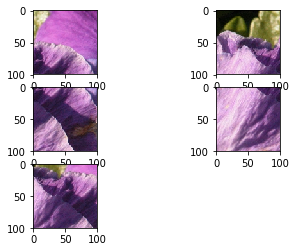

In [5]:
plt.subplot(3, 2, 1) # 1행 2열에서 1번째 열
plt.imshow(rotate[0])
plt.subplot(3, 2, 2) # 1행 2열에서 2번째 열
plt.imshow(rotate[1])
plt.subplot(3, 2, 3) # 1행 2열에서 2번째 열
plt.imshow(rotate[2])
plt.subplot(3, 2, 4) # 1행 2열에서 2번째 열
plt.imshow(rotate[3])
plt.subplot(3, 2, 5) # 1행 2열에서 2번째 열
plt.imshow(rotate[4]) #center cropped image

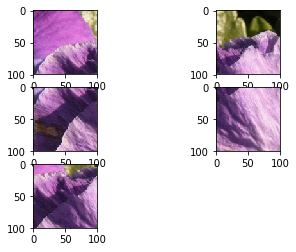

In [6]:
plt.subplot(3, 2, 1) # 1행 2열에서 1번째 열
plt.imshow(rotate[5])
plt.subplot(3, 2, 2) # 1행 2열에서 2번째 열
plt.imshow(rotate[6])
plt.subplot(3, 2, 3) # 1행 2열에서 2번째 열
plt.imshow(rotate[7])
plt.subplot(3, 2, 4) # 1행 2열에서 2번째 열
plt.imshow(rotate[8])
plt.subplot(3, 2, 5) # 1행 2열에서 2번째 열
plt.imshow(rotate[9]) #center cropped image

In [ ]:
i, j = 0, 0
for idx, image in enumerate(test_label):
    j = idx // num_ver
    i = idx - j * num_ver
    original[j * height : j * height + height, i * width : i * width + width, :] = image
original = original.squeeze()